In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm.auto import tqdm
import seaborn as sns
sns.set()

Data Analysis

In [16]:
res = pd.read_csv('res.csv')

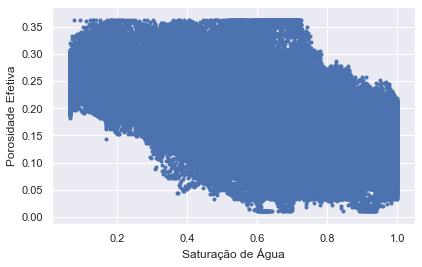

In [71]:
%matplotlib inline
plt.scatter(res['SW'],res['phie'],marker=".")
plt.xlabel('Saturação de Água')
plt.ylabel('Porosidade Efetiva')
plt.show()

Gap Statistic

In [43]:
from sklearn.cluster import *
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [44]:
data0=preprocessing.scale(res[['SW','phie','GR','ILD','RHOB','X','Y','Z']])

In [45]:
pca = PCA(n_components=3)
pcs = pca.fit_transform(data0).T
np.sum(pca.explained_variance_ratio_)

0.6456331882291736

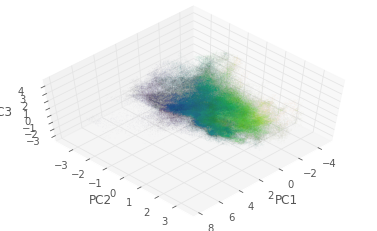

In [68]:
#%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[0],pcs[1],pcs[2],c=res['SW'],zdir='z',depthshade=True,s=0.0001)
ax.view_init(60, 45)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3')
plt.draw()
#%matplotlib inline


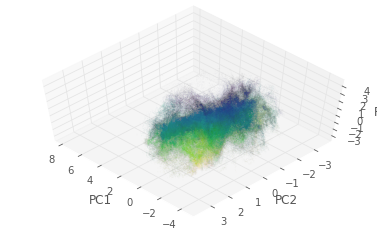

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pcs[0],pcs[1],pcs[2],c=res['SW'],zdir='z',depthshade=True,s=0.0001)
ax.view_init(60, 135)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('PC3')
plt.draw()

In [83]:
def gap_stat(data,nrefs=10,maxk=10):
    st_k=[]
    ref_wcss=[]
    real_wcss=[]
    for k in tqdm(range(1,maxk)):
        ref_sum=np.zeros(data.shape)
        ref_std=[]
        for n in range(nrefs):
            temp_data = (np.random.random_sample(size=data.shape))
            ref_sum= ref_sum + temp_data
            ref_std.append(np.std(temp_data))
        ref_data = ref_sum / len(temp_data)
        stdk = np.mean(ref_std)
        st_k.append(np.sqrt(1+(1/nrefs))*stdk)
        
        kmeans = KMeans(k,init='k-means++')
        ref_k = kmeans.fit(ref_data)
        ref_wcss.append(ref_k.inertia_)
        
        real_k = kmeans.fit(data)
        real_wcss.append(real_k.inertia_)
        
    gapk = np.log(np.array(ref_wcss)) - np.log(np.array(real_wcss))
        
    return gapk, np.array(st_k)

In [84]:
[gap, sk] = gap_stat(data0)

In [88]:
pd.DataFrame(gap,sk).to_excel('gap.xlsx')

In [8]:
kmeans = KMeans(3,init='k-means++')
new_data = res.copy()
new_data['Cluster0']=kmeans.fit_predict(pcs.T)
clusters0=new_data['Cluster0']

In [9]:
for i in new_data['Cluster0'].unique():
    print(i, len(new_data.loc[new_data['Cluster0'] == i]))

0 186199
2 147741
1 134279


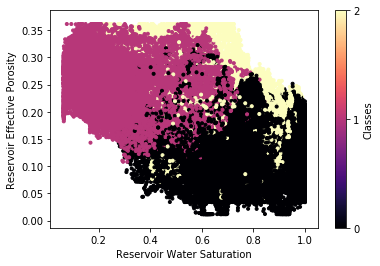

In [10]:
%matplotlib inline
plt.scatter(res['SW'],res['phie'],c=new_data['Cluster0'],marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.show()

Text(0.5, 0, 'J célula - Inlines')

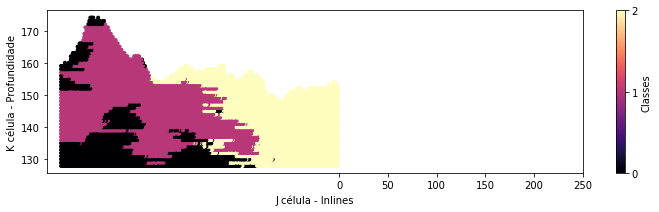

In [11]:
j_slice=int((np.max(new_data['j']))/2)
j_slice_data=new_data.loc[new_data['j'] == j_slice]
xplot = -j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

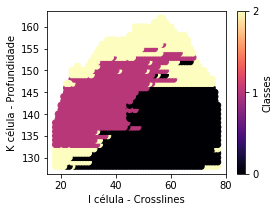

In [12]:
i_slice=int((np.max(new_data['i']))/2)
i_slice_data=new_data.loc[new_data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['Cluster0'],cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

Text(0.5, 0, 'Longitude')

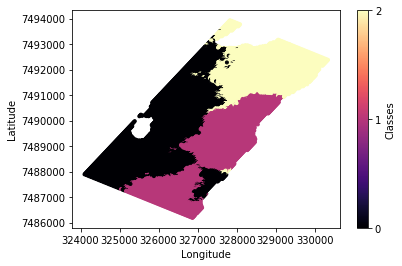

In [13]:
k_slice=int((np.median(new_data['k']))/1)
k_slice_data=new_data.loc[new_data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['Cluster0'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3,4],spacing='uniform',label='Classes')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [316]:
new_data.to_csv('cluster.csv')